In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000'sкт




***** dataset from sklearn *****

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

data = pd.DataFrame(boston['data'], columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
# data = data.drop(['CRIM', 'ZN', 'NOX', 'INDUS', 'PTRATIO', 'B'], axis = 1)
data = data.drop('B', axis = 1)

data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [ ]:
y = pd.DataFrame(boston['target'], columns = ['MEDV'])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


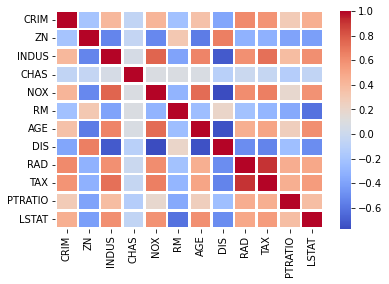

In [ ]:
import seaborn
from seaborn import heatmap 

seaborn.heatmap(data.corr(), linewidths = 1.5, linecolor = 'white', cmap = 'coolwarm') 

In [ ]:
y = np.array(y)
x = np.array(data)

print(x)
print()
print(y[:20])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 2.9600e+02 1.5300e+01 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 7.8800e+00]]

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state = 5)

In [ ]:
model = keras.Sequential()

model.add(Flatten(input_shape = (12,)))
model.add(Dense(12, activation = 'selu'))
model.add(Dense(32, activation = 'selu'))
model.add(Dense(128, activation = 'selu'))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1))

In [ ]:
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                      mode = 'min', 
                                                      patience = 40)

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(0.01), 
              loss = 'mse')
              # tensorflow.keras.losses.MeanSquaredLogarithmicError())
              # metrics=[tensorflow.keras.metrics.MeanSquaredError()])
              # loss = 'mean_absolute_percentage_error', 
              # metrics = ['accuracy'])

In [ ]:
history = model.fit(x = x_train, 
          y = y_train, 
          batch_size = 64,
          epochs = 700, 
          # callbacks = [early_stop],
          validation_split = 0.2,
          validation_data = [x_test, y_test],
          verbose = False)

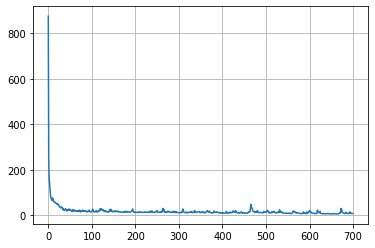

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 11.6895


11.68945598602295

In [ ]:
mass_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
model.predict(x_test)[:10]

4/4 [==============================] - 0s 4ms/step


array([[49.237656],
       [32.58225 ],
       [25.276497],
       [ 8.687081],
       [38.287937],
       [ 9.033442],
       [25.359278],
       [30.971281],
       [22.094746],
       [21.17442 ]], dtype=float32)

In [ ]:
y_test[:10]

array([[37.6],
       [27.9],
       [22.6],
       [13.8],
       [35.2],
       [10.4],
       [23.9],
       [29. ],
       [22.8],
       [23.2]])

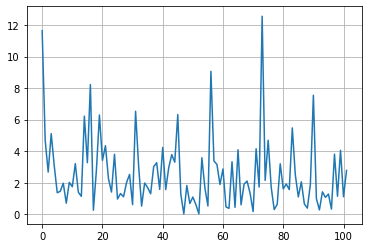

In [ ]:
mass = []
for i in range(len(y_test)): 
  mass.append((abs(y_test[i] - mass_pred[i])))

plt.plot(mass)
plt.grid(True)
plt.show()

In [ ]:
mass = np.array(mass)

np.unique(mass)

array([ 0.02464294,  0.02852402,  0.17347641,  0.25762711,  0.27919235,
        0.30257092,  0.32936535,  0.37809582,  0.39171143,  0.44121284,
        0.46825104,  0.51999207,  0.52764626,  0.60132751,  0.6128624 ,
        0.62115784,  0.63246727,  0.65818958,  0.68332958,  0.70525436,
        0.96932907,  0.99873505,  1.07454338,  1.09329071,  1.10213375,
        1.11129951,  1.11461372,  1.14018097,  1.14480247,  1.2857914 ,
        1.29154015,  1.30345383,  1.31401672,  1.33279457,  1.36655846,
        1.39673729,  1.4123951 ,  1.42271271,  1.45927773,  1.56567516,
        1.56621666,  1.57797394,  1.60847511,  1.66530266,  1.69471512,
        1.71386299,  1.72636185,  1.74662704,  1.82557487,  1.88780289,
        1.89892426,  1.90955238,  1.92242432,  1.97128105,  1.98134079,
        2.01054077,  2.0255806 ,  2.05833817,  2.10651093,  2.14797058,
        2.25695343,  2.51270447,  2.52738342,  2.67649689,  2.77848434,
        2.80181236,  2.87256355,  2.95720062,  3.01545925,  3.08

In [ ]:
# среднее отклонение 

print(sum(mass) / len(mass))

[2.55817533]
